In [1]:
import xarray as xr
from pathlib import Path

In [2]:
data_path = "/work/bk1450/b381575/data/VIKING20XJRAshort/"

W_files = sorted(Path(data_path).glob("*W.nc"))
print(len(W_files))

120


In [3]:
ds = xr.open_mfdataset(W_files, chunks={"time_counter": -1, "depthw": 1, "y": 200, "x": 200})
ds

<xarray.Dataset>
Dimensions:       (time_counter: 3652, y: 2499, x: 2404, depthw: 46)
Coordinates:
  * depthw        (depthw) float32 0.0 6.194 12.84 ... 5.25e+03 5.5e+03 5.75e+03
  * time_counter  (time_counter) datetime64[ns] 2010-01-01T12:00:00 ... 2019-...
Dimensions without coordinates: y, x
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<chunksize=(31, 200, 200), meta=np.ndarray>
    nav_lat       (time_counter, y, x) float32 dask.array<chunksize=(31, 200, 200), meta=np.ndarray>
    vovecrtz      (time_counter, depthw, y, x) float32 dask.array<chunksize=(31, 1, 200, 200), meta=np.ndarray>
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A

In [4]:
from dask.distributed import Client
client = Client()

CPU times: user 2.65 s, sys: 361 ms, total: 3.01 s
Wall time: 20.3 s


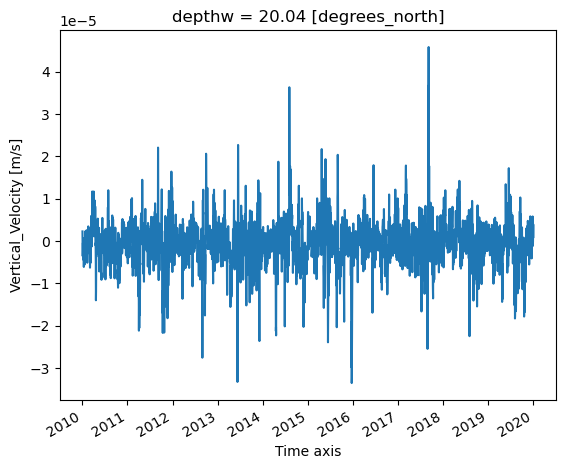

In [5]:
%%time

ds.isel(x=500, y=300, depthw=3).vovecrtz.plot()